In [146]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import calmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from dateutil.relativedelta import relativedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from itertools import product
import warnings
warnings.simplefilter('ignore')

In [147]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [148]:
# обратное преобразование Бокса-Кокса
def invboxcox(y,lmbda):
    if lmbda == 0:
        return (np.exp(y))
    else:
        return (np.exp(np.log(lmbda*y+1)/lmbda))

In [149]:
train = pd.read_csv("Data.csv")
test = pd.read_csv("Test.csv")

In [150]:
train.head()

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
0,2016-04-14,111.58,35,111.59,300,111.59,111.62,111.63,112.04,263236,22556,111.64
1,2016-04-14,5.10,100,5.25,100,5.11,5.11,5.11,5.09,2895,-94,5.10
2,2016-04-14,12.80,500,138.80,100,13.73,13.41,13.41,13.88,3403,-6597,13.51
3,2016-04-14,58.38,250,59.10,3600,59.10,59.19,59.20,59.80,13935,16246,59.23
4,2016-04-14,43.88,500,43.99,500,44.00,44.03,44.03,43.92,185,2215,44.03


In [151]:
train.tail()

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
18646,2016-09-14,28.05,100,28.22,320,28.0500,27.97,27.97,28.00,33741,-20253,28.00
18647,2016-09-14,116.14,3166,116.28,6509,116.2800,116.28,116.29,116.11,1791,253,116.28
18648,2016-09-14,32.09,300,32.10,900,32.1000,32.42,32.49,31.57,54312,54438,32.12
18649,2016-09-14,0.64,10100,0.67,300,0.6405,0.64,0.64,0.66,7708,-2064,0.64
18650,2016-09-14,0.00,0,0.00,0,12.7000,12.70,302.00,13.04,15201,5123,12.70


In [152]:
test.head()

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2
0,2016-09-15,3.05,200,4.63,100,3.45,3.45,0.00,3.47,0,11
1,2016-09-15,113.77,100,113.77,600,113.77,113.61,113.61,111.77,626338,-168775
2,2016-09-15,2.24,100,2.58,952,2.24,2.24,2.24,2.24,1560,-219
3,2016-09-15,3.62,100,3.64,200,3.64,3.66,3.66,3.28,34475,12846
4,2016-09-15,6.56,100,6.70,51,6.56,6.48,6.48,6.07,2536,-8063


In [153]:
test.tail()

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2
3902,2016-10-14,36.90,6822,36.91,7400,36.91,36.96,37.00,35.90,41166,7522
3903,2016-10-14,53.10,100,53.30,500,53.10,53.00,53.00,52.32,5435,-2872
3904,2016-10-14,29.79,300,30.71,100,30.71,30.71,30.71,30.36,17305,867
3905,2016-10-14,43.82,1000,43.88,1000,43.88,43.88,44.00,43.36,180,488
3906,2016-10-14,22.33,50,22.40,20,22.59,22.64,22.65,21.90,13802,716


In [154]:
train.isnull().values.any()

False

In [155]:
test.isnull().values.any()

False

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18651 entries, 0 to 18650
Data columns (total 12 columns):
Date              18651 non-null object
Bid_Price         18651 non-null float64
Bid_Shares        18651 non-null int64
Ask_Price         18651 non-null float64
Ask_Shares        18651 non-null int64
FeaturePrice1     18651 non-null float64
FeaturePrice2     18651 non-null float64
FeaturePrice3     18651 non-null float64
FeaturePrice4     18651 non-null float64
FeatureShares1    18651 non-null int64
FeatureShares2    18651 non-null int64
TargetPrice       18651 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 1.7+ MB


In [157]:
train.Date.value_counts()

2016-06-24    370
2016-06-27    225
2016-06-20    221
2016-06-29    219
2016-07-15    219
2016-06-03    218
2016-04-29    214
2016-08-01    211
2016-09-12    210
2016-08-08    208
2016-06-28    207
2016-05-03    205
2016-08-15    204
2016-04-18    203
2016-06-10    200
2016-08-04    199
2016-07-28    199
2016-09-06    198
2016-08-02    197
2016-08-16    197
2016-08-05    196
2016-07-12    196
2016-07-27    196
2016-08-10    194
2016-05-09    193
2016-05-02    189
2016-09-13    189
2016-08-09    188
2016-07-26    188
2016-06-13    187
             ... 
2016-04-22    156
2016-08-30    155
2016-04-19    155
2016-07-07    155
2016-06-17    154
2016-07-08    154
2016-05-24    154
2016-08-17    153
2016-05-19    152
2016-05-17    152
2016-07-05    152
2016-05-25    151
2016-07-19    151
2016-08-26    151
2016-07-06    150
2016-04-27    150
2016-06-02    149
2016-08-24    148
2016-04-20    147
2016-04-26    145
2016-08-18    145
2016-08-31    145
2016-06-08    141
2016-04-14    139
2016-05-13

In [158]:
plt.rcParams['figure.figsize']=15,7

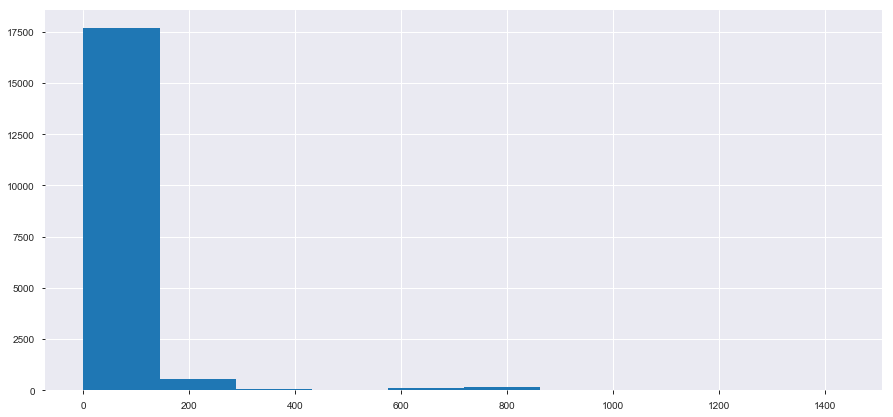

In [159]:
train['Bid_Price'].hist();

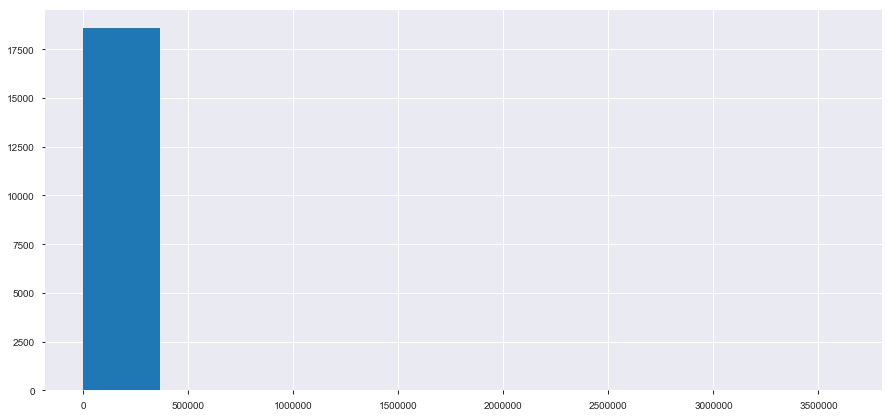

In [160]:
train['Bid_Shares'].hist();

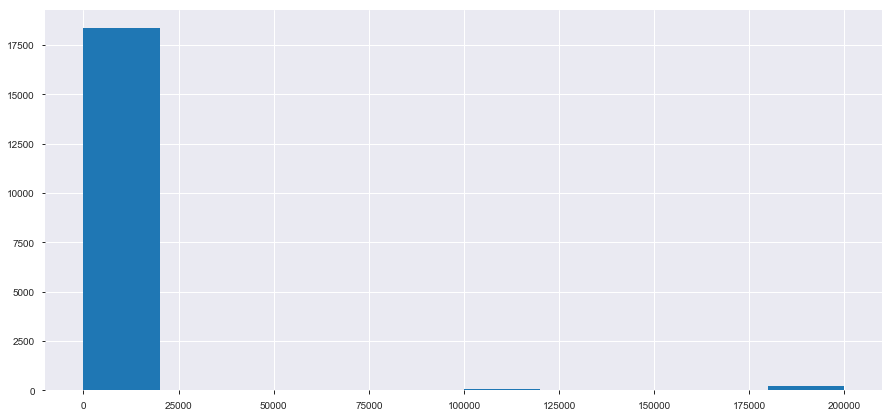

In [161]:
train['Ask_Price'].hist();

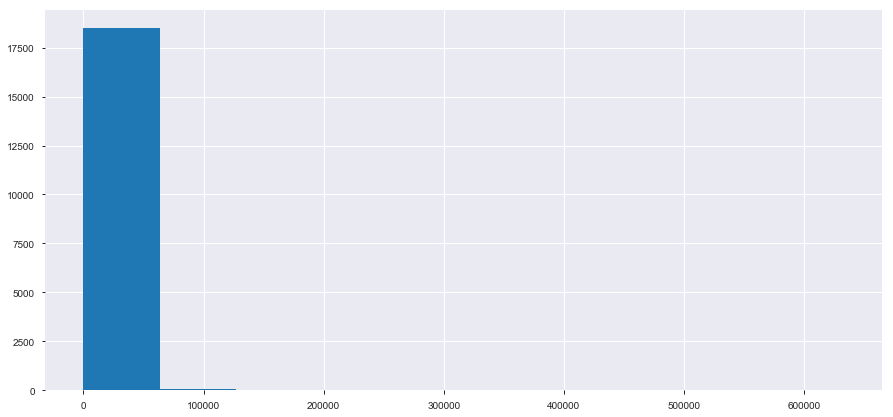

In [162]:
train['Ask_Shares'].hist();

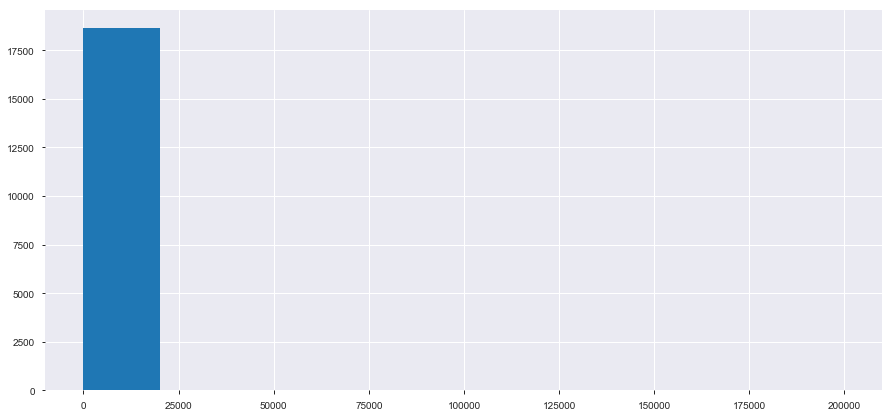

In [163]:
train['FeaturePrice1'].hist();

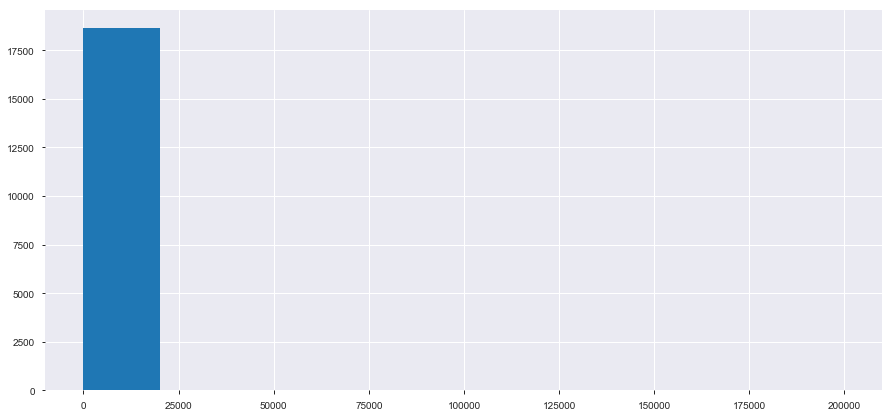

In [164]:
train['FeaturePrice2'].hist();

In [165]:
train.shape

(18651, 12)

In [438]:
plt.rcParams['figure.figsize']=15,100


In [ ]:
["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares1"]

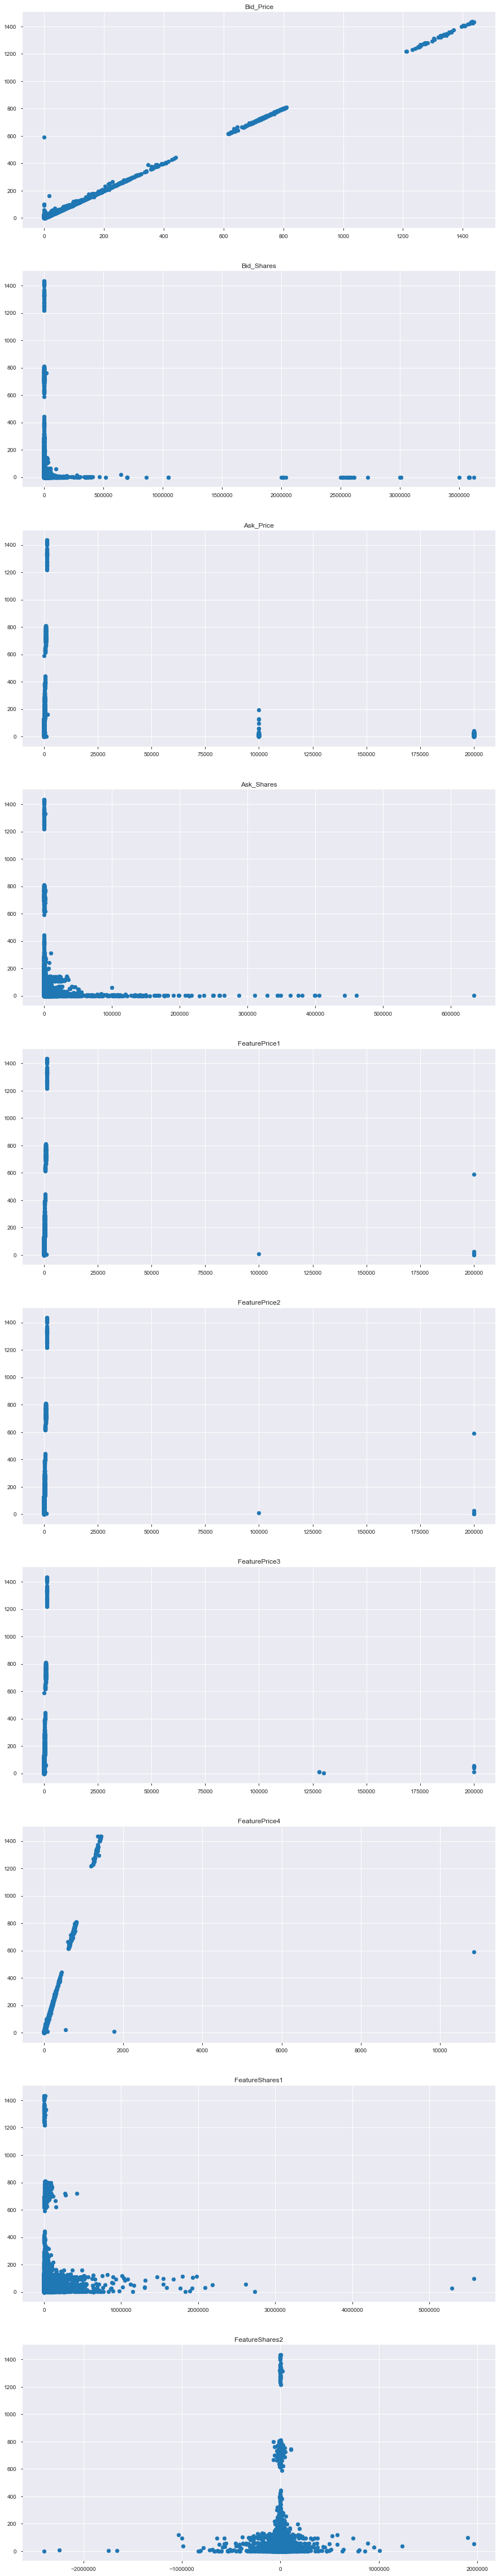

In [223]:
for i, col in enumerate(train.columns[1:-1]):
    plt.subplot(12,1,i+1)
    plt.scatter(train[col],train["TargetPrice"])
    
    plt.title(col)

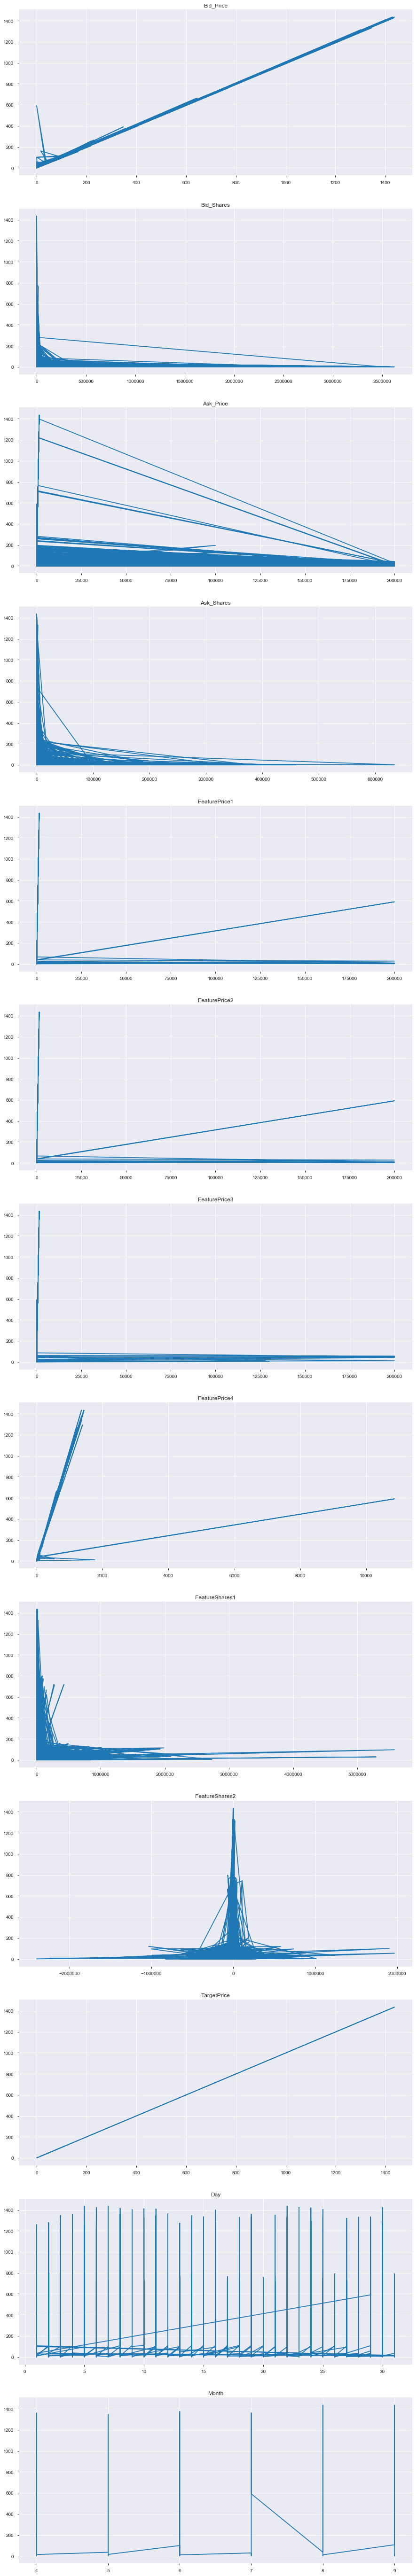

In [440]:
for i, col in enumerate(train.columns[1:-1]):
    plt.subplot(13,1,i+1)
    plt.plot(train[col],train["TargetPrice"])
    
    plt.title(col)

In [224]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

In [226]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [227]:
train['Date'] = train.Date.apply(pd.to_datetime)
test['Date'] = test.Date.apply(pd.to_datetime)

In [254]:
train['Day'] = train.Date.dt.day
train['Month'] = train.Date.dt.month
train['Year'] = train.Date.dt.year

test['Day'] = test.Date.dt.day
test['Month'] = test.Date.dt.month
test['Year'] = test.Date.dt.year

In [255]:
tmp_train = train.Date.value_counts()*0+20
test_data = test.Date.value_counts()*0+10
all_data = pd.concat([tmp_train, test_data])

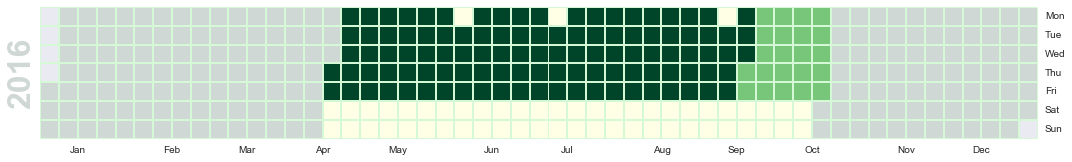

In [256]:
fig, ax = calmap.calendarplot(all_data, fig_kws={"figsize":(15,12)}, fillcolor='#d0d8d6', cmap='YlGn',linecolor='#d5f8d6')

In [739]:
X,y = train.drop("TargetPrice",axis=1),train["TargetPrice"]

In [258]:
train_start_date = train.Date.min()
train_start_date

Timestamp('2016-04-14 00:00:00')

In [259]:
train_end_date = train.Date.max()
train_end_date

Timestamp('2016-09-14 00:00:00')

In [260]:
test_start_date = test.Date.min()
test_start_date

Timestamp('2016-09-15 00:00:00')

In [261]:
test_end_date = test.Date.max()
test_end_date

Timestamp('2016-10-14 00:00:00')

In [262]:
holdout_start_date = train_end_date - relativedelta(test_end_date,test_start_date)
holdout_start_date

Timestamp('2016-08-16 00:00:00')

In [263]:
holdout_end_date = holdout_start_date+relativedelta(test_end_date,test_start_date)
holdout_end_date

Timestamp('2016-09-14 00:00:00')

In [264]:
def train_test_split_h(df, train_end_date):
    train= df.loc[df.Date < train_end_date]
    validation = df.loc[(df.Date >= train_end_date)]#&\
                  #(df.date <= finish)]
    return train, validation

In [520]:
def train_test_split_h(df, train_end_date):
    train= df.loc[df.Date < train_end_date]
    validation = df.loc[(df.Date >= train_end_date)]#&\
                  #(df.date <= finish)]
    return train, validation

In [265]:
train_df, validation_df = train_test_split_h(train, holdout_start_date)

In [266]:
test_df = test.copy()

In [267]:
holdout_start_date

Timestamp('2016-08-16 00:00:00')

In [268]:
train_data = train_df.Date.value_counts()*0 + 5
valid_data = validation_df.Date.value_counts()*0 + 10
test_data = test_df.Date.value_counts()*0 + 15
all_data = pd.concat([train_data, valid_data, test_data])

In [269]:
test_data

2016-09-16    15
2016-09-19    15
2016-09-21    15
2016-09-26    15
2016-10-13    15
2016-10-03    15
2016-10-06    15
2016-10-10    15
2016-09-22    15
2016-09-20    15
2016-09-28    15
2016-09-29    15
2016-10-11    15
2016-09-27    15
2016-09-30    15
2016-10-07    15
2016-10-04    15
2016-09-23    15
2016-09-15    15
2016-10-14    15
2016-10-05    15
2016-10-12    15
Name: Date, dtype: int64

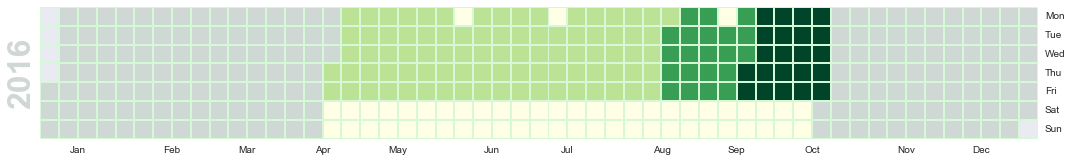

In [270]:
fig, ax = calmap.calendarplot(all_data, fig_kws={"figsize":(15,12)}, fillcolor='#d0d8d6', cmap='YlGn',linecolor='#d5f8d6')


In [271]:
X_train,y_train = train_df.drop("TargetPrice",axis=1), train_df["TargetPrice"]
X_valid,y_valid = validation_df.drop("TargetPrice",axis=1), validation_df["TargetPrice"]

In [275]:
Date_Col_train = X_train["Date"]
Date_Col_val = X_valid["Date"]

In [276]:
X_train.drop("Date",axis=1,inplace=True)
X_valid.drop("Date",axis=1,inplace=True)

In [582]:
len(train.Date.value_counts())

107

In [584]:
len(test.Date.value_counts())

22

In [827]:
days = len(train.Date.value_counts())+len(test.Date.value_counts())

In [828]:
train_end_date

Timestamp('2016-09-14 00:00:00')

In [829]:
dates_validation = []
def train_dates_generator(df, start_train, end_train, val_size, n_folds):
    train_days = len(train.Date.value_counts())
    if train_days >= val_size.days*n_folds:
        for i in range(0,n_folds):
            start_validation = end_train - val_size*n_folds
            dates_validation.append((start_train,start_validation))
            start_train = start_train + val_size
            n_folds-=1
    else:
        print("Take smaller val_size or n_folds number")

In [830]:
validation_size = relativedelta(test_end_date,test_start_date)

In [831]:
validation_size

relativedelta(days=+29)

In [832]:
train_dates_generator(X, train_start_date, train_end_date, validation_size, 3)

In [833]:
dates_validation

[(Timestamp('2016-04-14 00:00:00'), Timestamp('2016-06-19 00:00:00')),
 (Timestamp('2016-05-13 00:00:00'), Timestamp('2016-07-18 00:00:00')),
 (Timestamp('2016-06-11 00:00:00'), Timestamp('2016-08-16 00:00:00'))]

In [834]:
for i in dates_validation:
    x = i[0]
    y = i[1]
    print("start train {}".format(x))
    print("start validate {}".format(y))
    print()

start train 2016-04-14 00:00:00
start validate 2016-06-19 00:00:00

start train 2016-05-13 00:00:00
start validate 2016-07-18 00:00:00

start train 2016-06-11 00:00:00
start validate 2016-08-16 00:00:00



In [835]:
def create_validation(df, train_start_date, validation_start_date):
    return df.loc[(df['Date'] >= train_start_date - relativedelta(days=0)) & \
                  (df['Date'] <  validation_start_date)].index, \
           df.loc[(df['Date'] >= validation_start_date) & \
                  (df['Date'] <=  validation_start_date + relativedelta(test_end_date,test_start_date))].index,\

In [836]:
myCViterator = []
for i in dates_validation:
    trainIndices, valIndices= create_validation(X, i[0],i[1])
    myCViterator.append( (trainIndices, valIndices) )

In [837]:
for i,j in myCViterator:
    print (min(i), min(j))

0 7671
3536 11221
6824 15085


In [838]:
myCViterator

[(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
              ...
              7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670],
             dtype='int64', length=7671),
  Int64Index([ 7671,  7672,  7673,  7674,  7675,  7676,  7677,  7678,  7679,
               7680,
              ...
              11386, 11387, 11388, 11389, 11390, 11391, 11392, 11393, 11394,
              11395],
             dtype='int64', length=3725)),
 (Int64Index([ 3536,  3537,  3538,  3539,  3540,  3541,  3542,  3543,  3544,
               3545,
              ...
              11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
              11220],
             dtype='int64', length=7685),
  Int64Index([11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229,
              11230,
              ...
              15272, 15273, 15274, 15275, 15276, 15277, 15278, 15279, 15280,
              15281],
             dtype='int64', length=4061)),
 (Int64Index([ 682

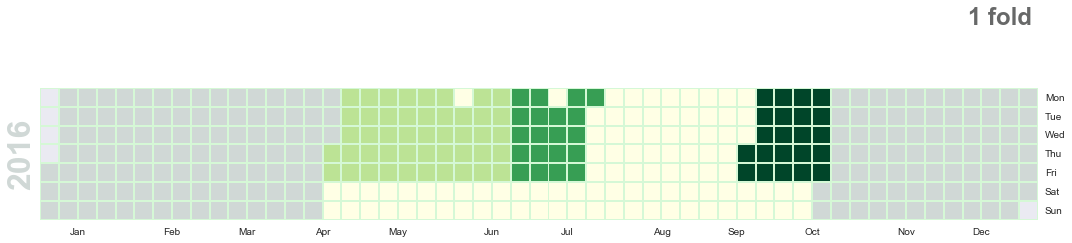

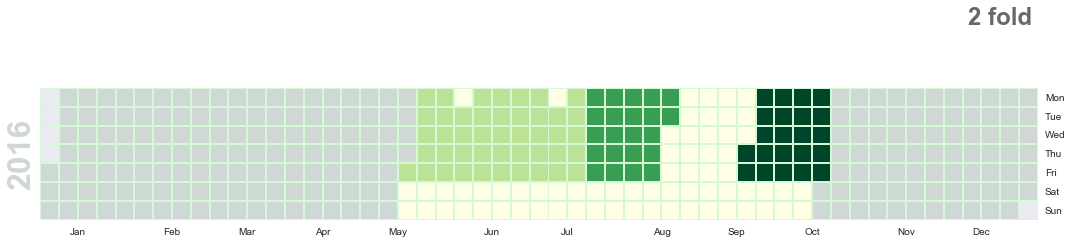

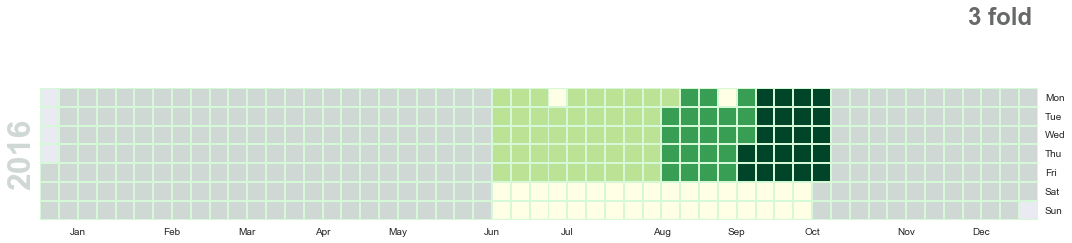

In [839]:
fold_number = 1
for i,j in myCViterator:
    #X.iloc[i]
    #y.iloc[i]
    #X.iloc[j]
    #y.iloc[j]
    train_data = X.iloc[i].Date.value_counts()*0 + 5
    valid_data = X.iloc[j].Date.value_counts()*0 + 10
    #test_data = test_df.Date.value_counts()*0 + 15
    all_data = pd.concat([train_data, valid_data, test_data])
    fig, ax = calmap.calendarplot(all_data, fig_kws={"figsize":(15,12)}, fillcolor='#d0d8d6', cmap='YlGn',linecolor='#d5f8d6')
    
    text = "{} fold".format(fold_number)
    fold_number += 1
    fig.text(x=0.9, y=0.65, s=text, fontsize=24, weight='bold', color='#676868')


In [279]:
#маштабируем данные. считаем средние и стандартные отклонение по каждому признаку

In [277]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [280]:
linreg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [283]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

2.5300555905674917

In [284]:
mean_absolute_error(y_valid, linreg.predict(X_valid_scaled))

1.0648285436191616

In [290]:
plt.rcParams['figure.figsize']=15,15


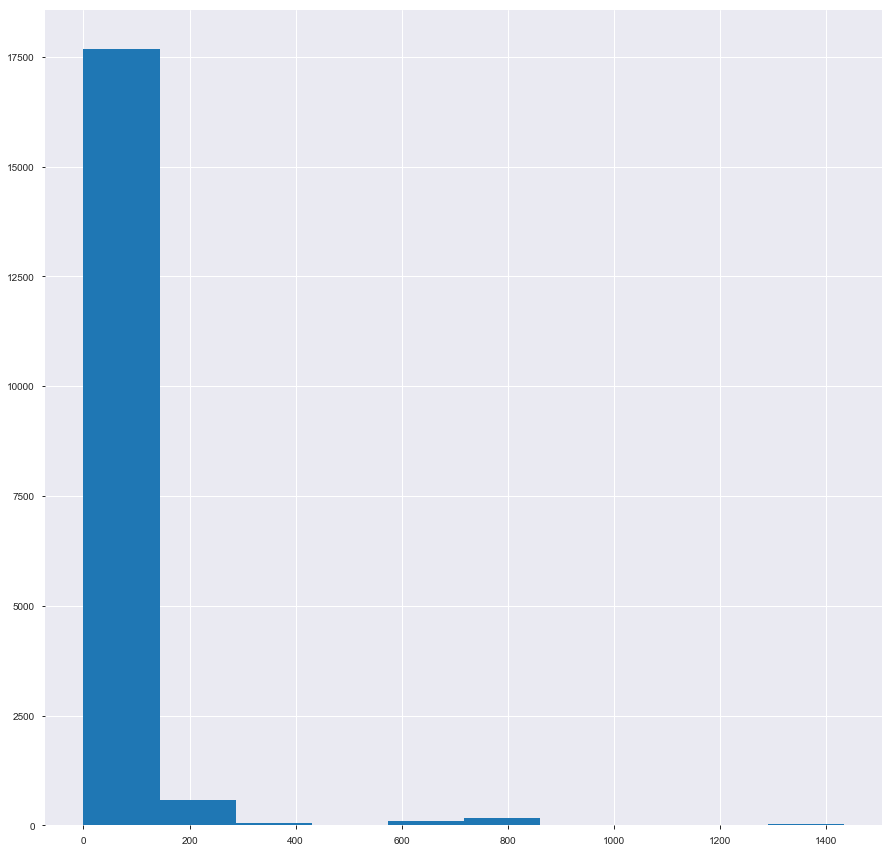

In [291]:
train['TargetPrice'].hist();

In [295]:
train

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice,Day,Month,Year
0,2016-04-14,111.58,35,111.59,300,111.5900,111.6200,111.630,112.0400,263236,22556,111.6400,14,4,2016
1,2016-04-14,5.10,100,5.25,100,5.1100,5.1100,5.110,5.0900,2895,-94,5.1000,14,4,2016
2,2016-04-14,12.80,500,138.80,100,13.7300,13.4100,13.410,13.8800,3403,-6597,13.5100,14,4,2016
3,2016-04-14,58.38,250,59.10,3600,59.1000,59.1900,59.200,59.8000,13935,16246,59.2300,14,4,2016
4,2016-04-14,43.88,500,43.99,500,44.0000,44.0300,44.030,43.9200,185,2215,44.0300,14,4,2016
5,2016-04-14,0.53,100,0.74,200,0.7400,0.7400,0.740,0.7300,2429,71,0.7400,14,4,2016
6,2016-04-14,21.18,5000,21.25,400,21.2500,21.3400,21.370,21.3100,136066,92332,21.3100,14,4,2016
7,2016-04-14,2.78,340,2.79,400,2.7800,2.7200,2.720,2.8000,146493,-263308,2.7700,14,4,2016
8,2016-04-14,1.48,100,1.75,100,1.7500,1.7500,1.750,1.7400,8050,543,1.7500,14,4,2016
9,2016-04-14,616.02,8,616.50,1700,616.5000,616.6100,616.610,614.8200,25309,1443,616.5000,14,4,2016


In [309]:
train.columns.delete([0,11])

Index(['Bid_Price', 'Bid_Shares', 'Ask_Price', 'Ask_Shares', 'FeaturePrice1',
       'FeaturePrice2', 'FeaturePrice3', 'FeaturePrice4', 'FeatureShares1',
       'FeatureShares2', 'Day', 'Month', 'Year'],
      dtype='object')

In [310]:
linreg.coef_

array([ 1.11660223e+02, -7.14002660e-02,  5.11114516e-01, -8.27224789e-02,
        1.02100253e+03, -1.02110881e+03,  3.97949067e-01,  8.26797009e+00,
       -1.47640578e-01,  2.04359505e-02,  1.49829332e-02,  7.77610644e-03,
        0.00000000e+00])

In [315]:
pd.DataFrame(linreg.coef_,
             train.columns.delete([0,11]),columns=['coef']).sort_values(by='coef',
                                                                       ascending=False)

,coef
FeaturePrice1,1021.002528
Bid_Price,111.660223
FeaturePrice4,8.267970
Ask_Price,0.511115
FeaturePrice3,0.397949
FeatureShares2,0.020436
Day,0.014983
Month,0.007776
Year,0.000000
Bid_Shares,-0.071400


In [1234]:
def train_validate_report(model, X_train_scaled,
                          y_train, X_valid_scaled, y_valid, feature_names,
                         forest=False, bagging=False):
    """
    For linear models and regression trees
    """
    
    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_valid_scaled)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, prediction)))
    print("MAE=%f" % mean_absolute_error(y_valid, prediction))
    #print("Model coefficients:")
    coef = model.feature_importances_ if forest else "It's bagging. No model.coef_/model.feature_importances_" if bagging else model.coef_
    coef_name = 'Importance' if forest else 'Coefficients'
    print(coef_name)
    print(pd.DataFrame(coef,
             feature_names,columns=['coef']).sort_values(by='coef',
                                                        ascending=False))
    return prediction

In [449]:
%%time
lasso_prediction = train_validate_report(lasso, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]))

MSE=2.697463
MAE=1.322221
Coefficients
                      coef
Bid_Price       111.157972
FeaturePrice4     7.636051
Bid_Shares       -0.000000
Ask_Price         0.000000
Ask_Shares       -0.000000
FeaturePrice1     0.000000
FeaturePrice2     0.000000
FeaturePrice3     0.000000
FeatureShares1   -0.000000
FeatureShares2    0.000000
Day               0.000000
Month             0.000000
Year              0.000000
Wall time: 9.99 ms


In [450]:
%%time
lasso_cv_prediction = train_validate_report(lasso_cv, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]))

MSE=2.522702
MAE=1.110126
Coefficients
                      coef
Bid_Price       111.550009
FeaturePrice4     8.011675
Ask_Price         0.181858
FeaturePrice3     0.090992
Bid_Shares       -0.000000
Ask_Shares       -0.000000
FeaturePrice1     0.000000
FeaturePrice2     0.000000
FeatureShares1   -0.000000
FeatureShares2    0.000000
Day               0.000000
Month             0.000000
Year              0.000000
Wall time: 125 ms


In [392]:
#гребневая регрессия/ веса не зануляются явно

In [451]:
%%time
ridge_prediction = train_validate_report(ridge, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]))

MSE=2.519803
MAE=1.053367
Coefficients
                      coef
Bid_Price       111.633931
FeaturePrice4     8.289116
FeaturePrice1     0.583591
Ask_Price         0.511771
FeaturePrice3     0.397751
Day               0.011895
Month             0.006541
FeatureShares2    0.001626
Year              0.000000
Bid_Shares       -0.072927
Ask_Shares       -0.082731
FeatureShares1   -0.148412
FeaturePrice2    -0.695148
Wall time: 8.96 ms


In [452]:
%%time
ridge_cv_prediction=train_validate_report(ridge_cv, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]))

MSE=2.518009
MAE=1.052856
Coefficients
                      coef
Bid_Price       111.653659
FeaturePrice4     8.272688
FeaturePrice1     6.306195
Ask_Price         0.511678
FeaturePrice3     0.397460
Day               0.012027
Month             0.006618
FeatureShares2    0.001694
Year              0.000000
Bid_Shares       -0.072794
Ask_Shares       -0.082455
FeatureShares1   -0.148551
FeaturePrice2    -6.413596
Wall time: 30 ms


In [467]:
rfr = RandomForestRegressor(random_state=17,criterion='mae', n_estimators=100)

In [ ]:
criterion='mae',

In [456]:
%%time
rfr_mse_ten_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=7.374469
MAE=0.359232
Importance
                    coef
FeaturePrice4   0.743570
Bid_Price       0.192101
FeaturePrice1   0.027834
FeaturePrice3   0.015525
Ask_Price       0.012696
FeaturePrice2   0.008123
Month           0.000120
Bid_Shares      0.000014
Day             0.000008
FeatureShares2  0.000004
Ask_Shares      0.000004
FeatureShares1  0.000002
Year            0.000000
Wall time: 904 ms


In [457]:
%%time
rfr_mse_scaled_ten_est_prediction = train_validate_report(rfr, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=7.441400
MAE=0.373224
Importance
                    coef
FeaturePrice4   0.743376
Bid_Price       0.185543
FeaturePrice1   0.028034
Ask_Price       0.026474
FeaturePrice2   0.008707
FeaturePrice3   0.007712
Month           0.000124
Bid_Shares      0.000014
FeatureShares2  0.000005
Day             0.000004
FeatureShares1  0.000004
Ask_Shares      0.000003
Year            0.000000
Wall time: 894 ms


In [461]:
%%time
rfr_mse_100_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=8.214991
MAE=0.356118
Importance
                    coef
FeaturePrice4   0.760991
Bid_Price       0.156056
FeaturePrice1   0.028367
FeaturePrice3   0.026447
Ask_Price       0.016859
FeaturePrice2   0.011156
Month           0.000090
Day             0.000020
Bid_Shares      0.000005
FeatureShares1  0.000004
Ask_Shares      0.000003
FeatureShares2  0.000003
Year            0.000000
Wall time: 8.89 s


In [462]:
%%time
rfr_mse_scaled_100_est_prediction = train_validate_report(rfr, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=8.257602
MAE=0.363776
Importance
                    coef
FeaturePrice4   0.762118
Bid_Price       0.157909
FeaturePrice1   0.028892
FeaturePrice3   0.026631
Ask_Price       0.015325
FeaturePrice2   0.009029
Month           0.000069
Day             0.000013
FeatureShares1  0.000005
Bid_Shares      0.000004
FeatureShares2  0.000003
Ask_Shares      0.000003
Year            0.000000
Wall time: 8.94 s


In [465]:
%%time
rfr_mae_ten_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.505636
MAE=0.310344
Importance
                    coef
FeaturePrice4   0.540031
FeaturePrice1   0.208230
FeaturePrice2   0.122726
Bid_Price       0.080910
FeaturePrice3   0.037400
Ask_Price       0.009108
Month           0.000412
Day             0.000283
FeatureShares2  0.000265
FeatureShares1  0.000212
Bid_Shares      0.000212
Ask_Shares      0.000210
Year            0.000000
Wall time: 38.9 s


In [466]:
%%time
rfr_mae_scaled_ten_est_prediction = train_validate_report(rfr, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.829086
MAE=0.331871
Importance
                    coef
FeaturePrice4   0.564644
FeaturePrice1   0.211198
FeaturePrice2   0.116094
Bid_Price       0.060891
FeaturePrice3   0.040305
Ask_Price       0.004962
Month           0.000630
Bid_Shares      0.000280
Day             0.000273
FeatureShares2  0.000265
FeatureShares1  0.000233
Ask_Shares      0.000225
Year            0.000000
Wall time: 39.3 s


In [468]:
%%time
rfr_mae_100_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=3.092457
MAE=0.270174
Importance
                    coef
FeaturePrice4   0.501862
FeaturePrice1   0.248220
FeaturePrice2   0.138902
Bid_Price       0.067786
FeaturePrice3   0.029469
Ask_Price       0.012139
Month           0.000326
Day             0.000287
FeatureShares2  0.000270
FeatureShares1  0.000264
Ask_Shares      0.000239
Bid_Shares      0.000238
Year            0.000000
Wall time: 6min 36s


In [469]:
%%time
rfr_mae_scaled_100_est_prediction = train_validate_report(rfr, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=3.274932
MAE=0.274551
Importance
                    coef
FeaturePrice4   0.502403
FeaturePrice1   0.264404
FeaturePrice2   0.123962
Bid_Price       0.066897
FeaturePrice3   0.028796
Ask_Price       0.011856
Month           0.000396
Day             0.000277
FeatureShares2  0.000262
FeatureShares1  0.000258
Bid_Shares      0.000247
Ask_Shares      0.000243
Year            0.000000
Wall time: 6min 38s


In [477]:
rfr = RandomForestRegressor(max_depth=15,random_state=17,criterion='mae', n_estimators=10)

In [478]:
%%time
_ = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.933810
MAE=0.318533
Importance
                    coef
FeaturePrice4   0.565610
FeaturePrice1   0.201468
FeaturePrice2   0.131591
Bid_Price       0.052275
FeaturePrice3   0.034326
Ask_Price       0.013388
FeatureShares1  0.000260
Day             0.000258
Bid_Shares      0.000246
FeatureShares2  0.000239
Ask_Shares      0.000195
Month           0.000144
Year            0.000000
Wall time: 38.8 s


In [479]:
%%time
_ = train_validate_report(rfr, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.836699
MAE=0.325529
Importance
                    coef
FeaturePrice4   0.565367
FeaturePrice1   0.207240
FeaturePrice2   0.125235
Bid_Price       0.050546
FeaturePrice3   0.036100
Ask_Price       0.013923
Month           0.000395
FeatureShares2  0.000276
Day             0.000246
FeatureShares1  0.000244
Bid_Shares      0.000221
Ask_Shares      0.000207
Year            0.000000
Wall time: 38.5 s


In [480]:
from sklearn.model_selection import GridSearchCV

In [847]:
rf = RandomForestRegressor(random_state=17,criterion='mae')

In [848]:
param_grid = {
    #'bootstrap': [True],
    'max_depth': [10, 25, 50, 100, None],
    'max_features':  ['auto', 'sqrt',2, 3, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 8 ],
    #'n_estimators': [100, 200, 300, 1000]
}

In [840]:
X = train.drop(["Date","TargetPrice"],axis=1)
y = train.TargetPrice

In [849]:
X.shape

(18651, 13)

In [850]:
y.shape

(18651,)

In [851]:
myCViterator

[(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
              ...
              7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670],
             dtype='int64', length=7671),
  Int64Index([ 7671,  7672,  7673,  7674,  7675,  7676,  7677,  7678,  7679,
               7680,
              ...
              11386, 11387, 11388, 11389, 11390, 11391, 11392, 11393, 11394,
              11395],
             dtype='int64', length=3725)),
 (Int64Index([ 3536,  3537,  3538,  3539,  3540,  3541,  3542,  3543,  3544,
               3545,
              ...
              11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
              11220],
             dtype='int64', length=7685),
  Int64Index([11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229,
              11230,
              ...
              15272, 15273, 15274, 15275, 15276, 15277, 15278, 15279, 15280,
              15281],
             dtype='int64', length=4061)),
 (Int64Index([ 682

In [852]:
for i,j in myCViterator:
    print (min(i), min(j))

0 7671
3536 11221
6824 15085


In [853]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = myCViterator, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 24.2min finished


GridSearchCV(cv=[(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670],
           dtype='int64', length=7671), Int64Index([ 7671,  7672,  7673,  7674,  7675,  7676,  7677,  7678,  7679,
             7680,
...644, 18645, 18646, 18647, 18648, 18649,
            18650],
           dtype='int64', length=3566))],
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 25, 50, 100, None], 'max_features': ['auto', 'sqrt', 2, 3], 'min_samples_

In [854]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [855]:
best_grid = grid_search.best_estimator_

In [553]:
best_grid.max_features = 'auto'

In [856]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [857]:
%%time
_ = train_validate_report(best_grid, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.616764
MAE=0.345921
Importance
                    coef
FeaturePrice4   0.541373
FeaturePrice1   0.197724
FeaturePrice2   0.132442
Bid_Price       0.089222
FeaturePrice3   0.034489
Ask_Price       0.003643
Month           0.000352
FeatureShares2  0.000177
Day             0.000173
FeatureShares1  0.000136
Bid_Shares      0.000135
Ask_Shares      0.000134
Year            0.000000
Wall time: 40.2 s


In [858]:
rf_baseline = RandomForestRegressor(random_state=17,criterion='mae')

In [859]:
%%time
_ = train_validate_report(rf_baseline, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.505636
MAE=0.310344
Importance
                    coef
FeaturePrice4   0.540031
FeaturePrice1   0.208230
FeaturePrice2   0.122726
Bid_Price       0.080910
FeaturePrice3   0.037400
Ask_Price       0.009108
Month           0.000412
Day             0.000283
FeatureShares2  0.000265
FeatureShares1  0.000212
Bid_Shares      0.000212
Ask_Shares      0.000210
Year            0.000000
Wall time: 40.2 s


In [562]:
param_grid = {
    'max_depth': [None,10, 25, 50], 
    'n_estimators': [10,50,100, 200]
}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = myCViterator, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

In [861]:
pp.ProfileReport(train)

Number of variables,15
Number of observations,18651
Total Missing (%),0.0%
Total size in memory,2.1 MiB
Average record size in memory,120.0 B
Numeric,11
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,3


# Feature Engineering

In [907]:
train_df = train.copy()
test_df = test.copy()

In [908]:
train_df.drop("Year",axis=1,inplace=True)
test_df.drop("Year",axis=1,inplace=True)

In [909]:
train_df["Price_Diff"] = train_df["Ask_Price"] - train_df["Bid_Price"]
test_df["Price_Diff"] = test_df["Ask_Price"] - test_df["Bid_Price"]

In [910]:
train_df["Shares_Diff"] = train_df["Ask_Shares"] - train_df["Bid_Shares"]
test_df["Shares_Diff"] = test_df["Ask_Shares"] - test_df["Bid_Shares"]

In [911]:
train_df["Day_Of_week"] = train_df.Date.dt.dayofweek
test_df["Day_Of_week"] = test_df.Date.dt.dayofweek

In [912]:
train_df["is_month_start"] = train_df.Date.dt.is_month_start.apply(lambda x: int(x))
test_df["is_month_start"] = test_df.Date.dt.is_month_start.apply(lambda x: int(x))

In [913]:
train_df["is_month_end"] = train_df.Date.dt.is_month_end.apply(lambda x: int(x))
test_df["is_month_end"] = test_df.Date.dt.is_month_end.apply(lambda x: int(x))

In [914]:
train_df

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice,Day,Month,Price_Diff,Shares_Diff,Day_Of_week,is_month_start,is_month_end
0,2016-04-14,111.58,35,111.59,300,111.5900,111.6200,111.630,112.0400,263236,22556,111.6400,14,4,0.01,265,3,0,0
1,2016-04-14,5.10,100,5.25,100,5.1100,5.1100,5.110,5.0900,2895,-94,5.1000,14,4,0.15,0,3,0,0
2,2016-04-14,12.80,500,138.80,100,13.7300,13.4100,13.410,13.8800,3403,-6597,13.5100,14,4,126.00,-400,3,0,0
3,2016-04-14,58.38,250,59.10,3600,59.1000,59.1900,59.200,59.8000,13935,16246,59.2300,14,4,0.72,3350,3,0,0
4,2016-04-14,43.88,500,43.99,500,44.0000,44.0300,44.030,43.9200,185,2215,44.0300,14,4,0.11,0,3,0,0
5,2016-04-14,0.53,100,0.74,200,0.7400,0.7400,0.740,0.7300,2429,71,0.7400,14,4,0.21,100,3,0,0
6,2016-04-14,21.18,5000,21.25,400,21.2500,21.3400,21.370,21.3100,136066,92332,21.3100,14,4,0.07,-4600,3,0,0
7,2016-04-14,2.78,340,2.79,400,2.7800,2.7200,2.720,2.8000,146493,-263308,2.7700,14,4,0.01,60,3,0,0
8,2016-04-14,1.48,100,1.75,100,1.7500,1.7500,1.750,1.7400,8050,543,1.7500,14,4,0.27,0,3,0,0
9,2016-04-14,616.02,8,616.50,1700,616.5000,616.6100,616.610,614.8200,25309,1443,616.5000,14,4,0.48,1692,3,0,0


# Retry models

In [279]:
#маштабируем данные. считаем средние и стандартные отклонение по каждому признаку

In [897]:
#train_df.drop("Date",axis=1,inplace=True)
#test_df.drop("Date",axis=1,inplace=True)

In [898]:
#scaler = StandardScaler()
#train_scaled = scaler.fit_transform(train_df)
#test_scaled = scaler.fit_transform(test_df)

In [921]:
X_train, X_valid =  train_test_split_h(train_df, holdout_start_date)

In [922]:
y_train = X_train["TargetPrice"]
y_valid = X_valid["TargetPrice"]

In [923]:
X_train.drop(["TargetPrice","Date"],axis=1,inplace=True)
X_valid.drop(["TargetPrice","Date"],axis=1,inplace=True)

In [924]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [926]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid)))

2.5304633988410896

In [927]:
mean_absolute_error(y_valid, linreg.predict(X_valid))

1.0636779343066618

In [928]:
plt.rcParams['figure.figsize']=15,15


def train_validate_report(model, X_train_scaled,
                          y_train, X_valid_scaled, y_valid, feature_names,
                         forest=False):
    """
    For linear models and regression trees
    """
    
    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_valid_scaled)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, prediction)))
    print("MAE=%f" % mean_absolute_error(y_valid, prediction))
    #print("Model coefficients:")
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'Importance' if forest else 'Coefficients'
    print(coef_name)
    print(pd.DataFrame(coef,
             feature_names,columns=['coef']).sort_values(by='coef',
                                                        ascending=False))
    return prediction

In [935]:
train_df.columns.delete([0,11])

Index(['Bid_Price', 'Bid_Shares', 'Ask_Price', 'Ask_Shares', 'FeaturePrice1',
       'FeaturePrice2', 'FeaturePrice3', 'FeaturePrice4', 'FeatureShares1',
       'FeatureShares2', 'Day', 'Month', 'Price_Diff', 'Shares_Diff',
       'Day_Of_week', 'is_month_start', 'is_month_end'],
      dtype='object')

In [936]:
%%time
lasso_cv_prediction = train_validate_report(lasso_cv, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]))

MSE=3.590834
MAE=1.845798
Coefficients
                        coef
Bid_Price       9.230864e-01
FeaturePrice4   5.543333e-02
FeaturePrice3   8.868626e-05
Ask_Price       1.764716e-05
FeatureShares2  2.287553e-07
Month          -0.000000e+00
is_month_start  0.000000e+00
Day_Of_week     0.000000e+00
Shares_Diff    -0.000000e+00
Price_Diff     -0.000000e+00
is_month_end   -0.000000e+00
Day             0.000000e+00
FeaturePrice2  -0.000000e+00
FeaturePrice1  -0.000000e+00
FeatureShares1 -9.421530e-07
Bid_Shares     -1.161374e-06
Ask_Shares     -1.028751e-05
Wall time: 153 ms


In [450]:
%%time
lasso_cv_prediction = train_validate_report(lasso_cv, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]))

MSE=2.522702
MAE=1.110126
Coefficients
                      coef
Bid_Price       111.550009
FeaturePrice4     8.011675
Ask_Price         0.181858
FeaturePrice3     0.090992
Bid_Shares       -0.000000
Ask_Shares       -0.000000
FeaturePrice1     0.000000
FeaturePrice2     0.000000
FeatureShares1   -0.000000
FeatureShares2    0.000000
Day               0.000000
Month             0.000000
Year              0.000000
Wall time: 125 ms


In [392]:
#гребневая регрессия/ веса не зануляются явно

In [937]:
%%time
ridge_prediction = train_validate_report(ridge, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]))

MSE=2.530458
MAE=1.063676
Coefficients
                        coef
Bid_Price       6.289810e-01
Ask_Price       3.146506e-01
FeaturePrice1   2.735199e-01
FeaturePrice4   5.605082e-02
Day_Of_week     1.340093e-02
Month           7.074768e-03
Day             2.315204e-03
FeaturePrice3   9.350101e-05
Shares_Diff     2.609586e-05
Bid_Shares      2.536575e-05
FeatureShares2  2.967850e-07
FeatureShares1 -1.315826e-06
Ask_Shares     -3.080191e-05
is_month_start -4.133895e-03
is_month_end   -1.443894e-01
FeaturePrice2  -2.735484e-01
Price_Diff     -3.146277e-01
Wall time: 10 ms


In [451]:
%%time
ridge_prediction = train_validate_report(ridge, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]))

MSE=2.519803
MAE=1.053367
Coefficients
                      coef
Bid_Price       111.633931
FeaturePrice4     8.289116
FeaturePrice1     0.583591
Ask_Price         0.511771
FeaturePrice3     0.397751
Day               0.011895
Month             0.006541
FeatureShares2    0.001626
Year              0.000000
Bid_Shares       -0.072927
Ask_Shares       -0.082731
FeatureShares1   -0.148412
FeaturePrice2    -0.695148
Wall time: 8.96 ms


In [938]:
%%time
ridge_cv_prediction=train_validate_report(ridge_cv, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]))

MSE=7.529704
MAE=1.896291
Coefficients
                    coef
Bid_Price       0.629082
Ask_Price       0.314556
FeaturePrice1   0.273545
FeaturePrice4   0.056053
Day_Of_week     0.013401
Month           0.007076
Day             0.002317
FeaturePrice3   0.000104
FeatureShares1  0.000043
Shares_Diff     0.000013
FeatureShares2  0.000000
Ask_Shares     -0.000015
Bid_Shares     -0.000027
is_month_start -0.004122
is_month_end   -0.144788
FeaturePrice2  -0.273579
Price_Diff     -0.314526
Wall time: 26 ms


In [452]:
%%time
ridge_cv_prediction=train_validate_report(ridge_cv, X_train_scaled, y_train,
                     X_valid_scaled, y_valid, 
                     feature_names=train.columns.delete([0,11]))

MSE=2.518009
MAE=1.052856
Coefficients
                      coef
Bid_Price       111.653659
FeaturePrice4     8.272688
FeaturePrice1     6.306195
Ask_Price         0.511678
FeaturePrice3     0.397460
Day               0.012027
Month             0.006618
FeatureShares2    0.001694
Year              0.000000
Bid_Shares       -0.072794
Ask_Shares       -0.082455
FeatureShares1   -0.148551
FeaturePrice2    -6.413596
Wall time: 30 ms


In [939]:
rfr = RandomForestRegressor(random_state=17,criterion='mae')

In [940]:
%%time
rfr_mse_ten_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]),forest=True)

MSE=4.711340
MAE=0.319195
Importance
                    coef
FeaturePrice4   0.539550
FeaturePrice1   0.231226
FeaturePrice2   0.108718
Bid_Price       0.080035
FeaturePrice3   0.029568
Ask_Price       0.009135
Day             0.000243
FeatureShares2  0.000226
Price_Diff      0.000220
FeatureShares1  0.000210
Shares_Diff     0.000207
Bid_Shares      0.000185
Ask_Shares      0.000168
Month           0.000167
Day_Of_week     0.000120
is_month_start  0.000011
is_month_end    0.000010
Wall time: 50.2 s


In [465]:
#was
%%time
rfr_mae_ten_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.505636
MAE=0.310344
Importance
                    coef
FeaturePrice4   0.540031
FeaturePrice1   0.208230
FeaturePrice2   0.122726
Bid_Price       0.080910
FeaturePrice3   0.037400
Ask_Price       0.009108
Month           0.000412
Day             0.000283
FeatureShares2  0.000265
FeatureShares1  0.000212
Bid_Shares      0.000212
Ask_Shares      0.000210
Year            0.000000
Wall time: 38.9 s


In [942]:
rfr = RandomForestRegressor(random_state=17,criterion='mae',n_estimators=100,n_jobs=-1)

In [943]:
%%time
rfr_mae_100_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]),forest=True)

MSE=2.923177
MAE=0.267413
Importance
                    coef
FeaturePrice4   0.491536
FeaturePrice1   0.236206
FeaturePrice2   0.158190
Bid_Price       0.071272
FeaturePrice3   0.027039
Ask_Price       0.013879
Day             0.000253
FeatureShares2  0.000229
Price_Diff      0.000224
FeatureShares1  0.000222
Month           0.000217
Ask_Shares      0.000206
Shares_Diff     0.000196
Bid_Shares      0.000195
Day_Of_week     0.000119
is_month_start  0.000011
is_month_end    0.000007
Wall time: 2min 29s


In [468]:
%%time
rfr_mae_100_est_prediction = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=3.092457
MAE=0.270174
Importance
                    coef
FeaturePrice4   0.501862
FeaturePrice1   0.248220
FeaturePrice2   0.138902
Bid_Price       0.067786
FeaturePrice3   0.029469
Ask_Price       0.012139
Month           0.000326
Day             0.000287
FeatureShares2  0.000270
FeatureShares1  0.000264
Ask_Shares      0.000239
Bid_Shares      0.000238
Year            0.000000
Wall time: 6min 36s


In [944]:
rfr = RandomForestRegressor(max_depth=15,random_state=17,criterion='mae', n_estimators=100)

In [945]:
%%time
_ = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]),forest=True)

MSE=3.136806
MAE=0.271613
Importance
                    coef
FeaturePrice4   0.498268
FeaturePrice1   0.245340
FeaturePrice2   0.150881
Bid_Price       0.064737
FeaturePrice3   0.026166
Ask_Price       0.012810
Month           0.000259
Price_Diff      0.000228
FeatureShares2  0.000208
Day             0.000207
FeatureShares1  0.000200
Bid_Shares      0.000197
Shares_Diff     0.000186
Ask_Shares      0.000181
Day_Of_week     0.000111
is_month_start  0.000016
is_month_end    0.000007
Wall time: 8min 41s


In [478]:
%%time
_ = train_validate_report(rfr, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]),forest=True)

MSE=4.933810
MAE=0.318533
Importance
                    coef
FeaturePrice4   0.565610
FeaturePrice1   0.201468
FeaturePrice2   0.131591
Bid_Price       0.052275
FeaturePrice3   0.034326
Ask_Price       0.013388
FeatureShares1  0.000260
Day             0.000258
Bid_Shares      0.000246
FeatureShares2  0.000239
Ask_Shares      0.000195
Month           0.000144
Year            0.000000
Wall time: 38.8 s


In [1152]:
rf = RandomForestRegressor(random_state=17,criterion='mae')

In [952]:
X_train, X_val = train_test_split_h(train, holdout_start_date)

In [956]:
y_train,y_val = X_train["TargetPrice"],X_val["TargetPrice"]

In [957]:
X_train.drop(["Date","TargetPrice"],axis=1,inplace=True)
X_val.drop(["Date","TargetPrice"],axis=1,inplace=True)

In [958]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [959]:
prediction_baseline = rf.predict(X_val)

In [961]:
baseline = mean_absolute_error(y_pred=prediction_baseline,y_true=y_val)

In [964]:
X_train, X_val = train_test_split_h(train_df, holdout_start_date)

In [965]:
y_train,y_val = X_train["TargetPrice"],X_val["TargetPrice"]

In [966]:
X_train.drop(["Date","TargetPrice"],axis=1,inplace=True)
X_val.drop(["Date","TargetPrice"],axis=1,inplace=True)

In [967]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [968]:
prediction_baseline_features = rf.predict(X_val)

In [969]:
baseline_features = mean_absolute_error(y_pred=prediction_baseline_features,y_true=y_val)

In [971]:
baseline_features

0.31919458496915304

In [972]:
baseline

0.310343939988783

In [977]:
indexes = [12,13,14,15,16,17,18,19]

In [987]:
new_features = train_df.iloc[:,11:20] 

In [1015]:
new_features

,TargetPrice,Day,Month,Price_Diff,Shares_Diff,Day_Of_week,is_month_start,is_month_end
0,111.6400,14,4,0.01,265,3,0,0
1,5.1000,14,4,0.15,0,3,0,0
2,13.5100,14,4,126.00,-400,3,0,0
3,59.2300,14,4,0.72,3350,3,0,0
4,44.0300,14,4,0.11,0,3,0,0
5,0.7400,14,4,0.21,100,3,0,0
6,21.3100,14,4,0.07,-4600,3,0,0
7,2.7700,14,4,0.01,60,3,0,0
8,1.7500,14,4,0.27,0,3,0,0
9,616.5000,14,4,0.48,1692,3,0,0


In [996]:
new_features_train = X_train.iloc[:,10:20] 
new_features_val = X_val.iloc[:,10:20] 

In [1009]:
#X_train_1 = pd.concat([X_train, new_features_train], axis=1).head()

In [1019]:
#pure data set
X_train_df = X_train.drop(X_train.iloc[:,10:20],axis=1)
X_val_df = X_val.drop(X_val.iloc[:,10:20],axis=1)

In [1022]:
%%time
_ = train_validate_report(rf, X_train_df, y_train,
                     X_val_df, y_val, 
                     feature_names=X_train_df.columns,forest=True)

MSE=4.821108
MAE=0.300458
Importance
                    coef
FeaturePrice4   0.563927
FeaturePrice1   0.236614
FeaturePrice2   0.085013
Bid_Price       0.078213
FeaturePrice3   0.022950
Ask_Price       0.012124
FeatureShares2  0.000297
FeatureShares1  0.000294
Ask_Shares      0.000293
Bid_Shares      0.000275
Wall time: 35.3 s


In [1036]:
pd.concat([X_train_df, new_features_train.iloc[:,[0,1]]],axis=1).columns

Index(['Bid_Price', 'Bid_Shares', 'Ask_Price', 'Ask_Shares', 'FeaturePrice1',
       'FeaturePrice2', 'FeaturePrice3', 'FeaturePrice4', 'FeatureShares1',
       'FeatureShares2', 'Day', 'Month'],
      dtype='object')

In [1042]:
tr = pd.concat([X_train_df, new_features_train.iloc[:,[0]]],axis=1)
val = pd.concat([X_val_df, new_features_val.iloc[:,[0]]],axis=1)

In [1048]:
tr = X_train_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares2","FeatureShares1","Ask_Shares","Bid_Shares"]]
val = X_val_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares2","FeatureShares1","Ask_Shares","Bid_Shares"]]

In [1049]:
%%time
_ = train_validate_report(rf, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=4.119071
MAE=0.300613
Importance
                    coef
FeaturePrice4   0.540380
FeaturePrice1   0.205007
FeaturePrice2   0.130182
Bid_Price       0.077340
FeaturePrice3   0.034659
Ask_Price       0.011290
FeatureShares2  0.000315
FeatureShares1  0.000292
Ask_Shares      0.000282
Bid_Shares      0.000251
Wall time: 34.5 s


In [1054]:
tr = X_train_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares2","FeatureShares1","Ask_Shares","Bid_Shares"]]
val = X_val_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares2","FeatureShares1","Ask_Shares","Bid_Shares"]]

In [1055]:
%%time
_ = train_validate_report(rf, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=4.119071
MAE=0.300613
Importance
                    coef
FeaturePrice4   0.540380
FeaturePrice1   0.205007
FeaturePrice2   0.130182
Bid_Price       0.077340
FeaturePrice3   0.034659
Ask_Price       0.011290
FeatureShares2  0.000315
FeatureShares1  0.000292
Ask_Shares      0.000282
Bid_Shares      0.000251
Wall time: 34.8 s


In [1058]:
tr = X_train_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares2","FeatureShares1"]]
val = X_val_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares2","FeatureShares1"]]

In [1059]:
%%time
_ = train_validate_report(rf, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=3.651329
MAE=0.284080
Importance
                    coef
FeaturePrice4   0.519466
FeaturePrice1   0.238140
FeaturePrice2   0.122994
Bid_Price       0.075698
FeaturePrice3   0.038972
Ask_Price       0.004022
FeatureShares2  0.000391
FeatureShares1  0.000316
Wall time: 28.4 s


In [1064]:
tr = X_train_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares1"]]
val = X_val_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares1"]]

In [1065]:
%%time
_ = train_validate_report(rf, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=3.569743
MAE=0.279760
Importance
                    coef
FeaturePrice4   0.515443
FeaturePrice1   0.245980
Bid_Price       0.102281
FeaturePrice2   0.085024
FeaturePrice3   0.043160
Ask_Price       0.007748
FeatureShares1  0.000363
Wall time: 22.9 s


In [ ]:
new_features_train = X_train.iloc[:,10:20] 
new_features_val = X_val.iloc[:,10:20] 

In [1081]:
new_features_train.head()

,Day,Month,Price_Diff,Shares_Diff,Day_Of_week,is_month_start,is_month_end
0,14,4,0.01,265,3,0,0
1,14,4,0.15,0,3,0,0
2,14,4,126.00,-400,3,0,0
3,14,4,0.72,3350,3,0,0
4,14,4,0.11,0,3,0,0


In [1105]:
tr = X_train_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares1"]]
val = X_val_df.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares1"]]

In [1106]:
%%time
_ = train_validate_report(rf, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=3.569743
MAE=0.279760
Importance
                    coef
FeaturePrice4   0.515443
FeaturePrice1   0.245980
Bid_Price       0.102281
FeaturePrice2   0.085024
FeaturePrice3   0.043160
Ask_Price       0.007748
FeatureShares1  0.000363
Wall time: 23.6 s


FeaturePrice4   0.498268
FeaturePrice1   0.245340
FeaturePrice2   0.150881
Bid_Price       0.064737
FeaturePrice3   0.026166
Ask_Price       0.012810
Month           0.000259
Price_Diff      0.000228
FeatureShares2  0.000208
Day             0.000207
FeatureShares1  0.000200
Bid_Shares      0.000197
Shares_Diff     0.000186
Ask_Shares      0.000181
Day_Of_week     0.000111
is_month_start  0.000016
is_month_end    0.000007

In [1098]:
%%time
_ = train_validate_report(rf, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=4.848031
MAE=0.297279
Importance
                    coef
FeaturePrice4   0.566039
FeaturePrice1   0.225793
FeaturePrice2   0.107845
Bid_Price       0.059783
FeaturePrice3   0.032518
Ask_Price       0.007608
FeatureShares1  0.000376
is_month_start  0.000024
is_month_end    0.000015
Wall time: 24.8 s


In [1153]:
param_grid = {
    #'bootstrap': [True],
    'max_depth': [None,10, 25, 50, 100],
    'max_features':  ['auto', 'sqrt',2, 3, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 8],
    #'n_estimators': [100, 200, 300, 1000]
}

In [1154]:
X = train.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares1"]]

In [1155]:
y = train.TargetPrice

In [1156]:
rf

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [1157]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = myCViterator, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed: 23.3min finished


GridSearchCV(cv=[(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670],
           dtype='int64', length=7671), Int64Index([ 7671,  7672,  7673,  7674,  7675,  7676,  7677,  7678,  7679,
             7680,
...644, 18645, 18646, 18647, 18648, 18649,
            18650],
           dtype='int64', length=3566))],
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [None, 10, 25, 50, 100], 'max_features': ['auto', 'sqrt', 2, 3, 5], 'min_sampl

In [1158]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [1160]:
best_grid = grid_search.best_estimator_

In [1161]:
grid_search.best_score_

0.9992627514385085

In [1179]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False)

In [1164]:
%%time
_ = train_validate_report(best_grid, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=1.508510
MAE=0.233659
Importance
                    coef
FeaturePrice4   0.257594
Bid_Price       0.244989
FeaturePrice1   0.244071
FeaturePrice2   0.188071
FeaturePrice3   0.047929
Ask_Price       0.016894
FeatureShares1  0.000452
Wall time: 11 s


In [1165]:
%%time
_ = train_validate_report(rf, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=3.569743
MAE=0.279760
Importance
                    coef
FeaturePrice4   0.515443
FeaturePrice1   0.245980
Bid_Price       0.102281
FeaturePrice2   0.085024
FeaturePrice3   0.043160
Ask_Price       0.007748
FeatureShares1  0.000363
Wall time: 23.2 s


In [1127]:
train.columns

Index(['Date', 'Bid_Price', 'Bid_Shares', 'Ask_Price', 'Ask_Shares',
       'FeaturePrice1', 'FeaturePrice2', 'FeaturePrice3', 'FeaturePrice4',
       'FeatureShares1', 'FeatureShares2', 'TargetPrice', 'Day', 'Month',
       'Year'],
      dtype='object')

In [1130]:
plt.rcParams['figure.figsize']=15,100

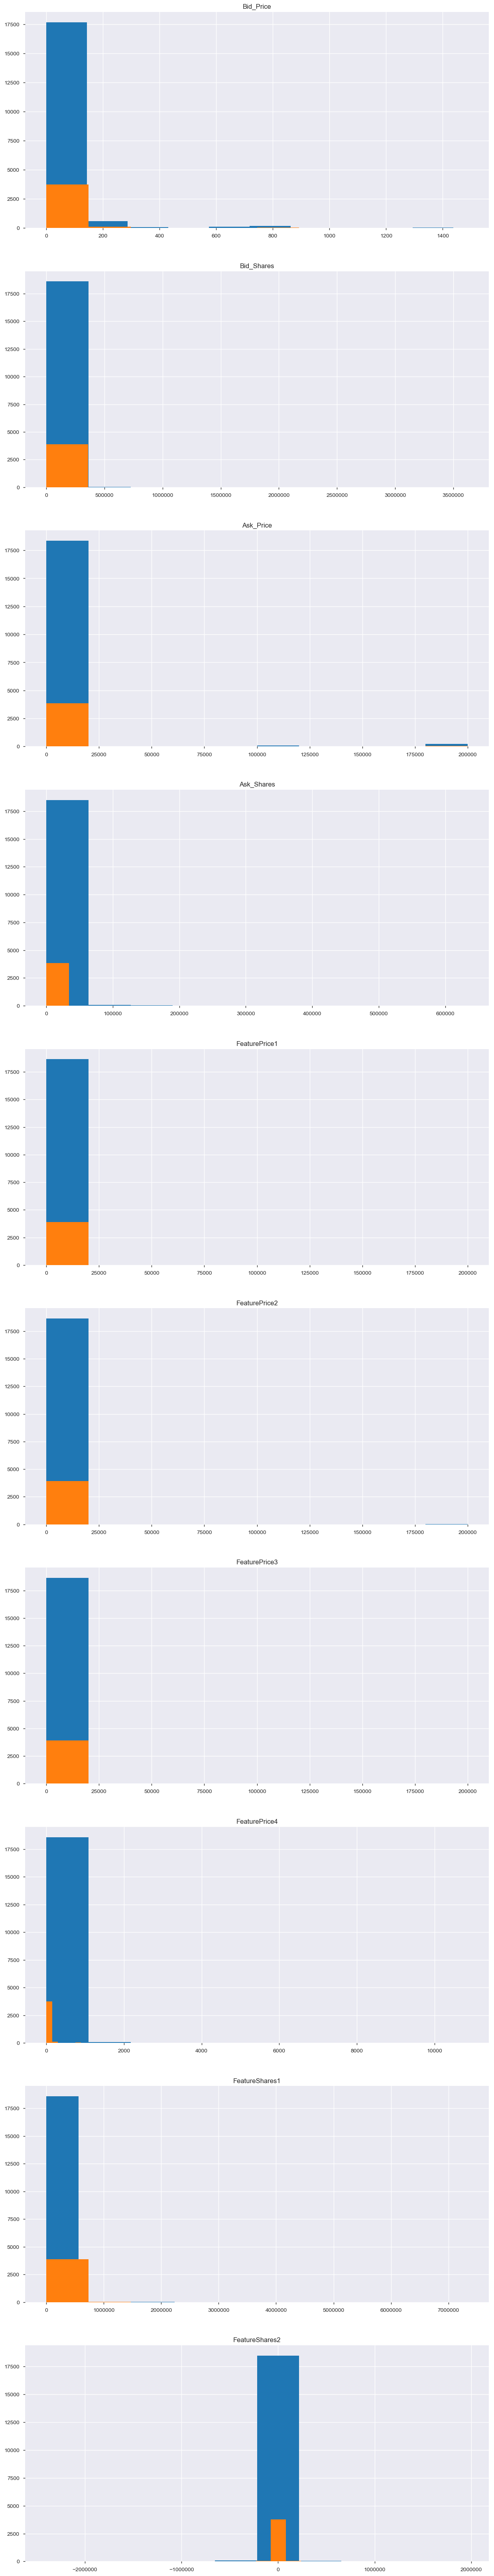

In [1134]:
for i, col in enumerate(train.columns[1:-4]):
    plt.subplot(12,1,i+1)
    plt.hist(train[col])
    plt.hist(test[col])
    plt.title(col)

In [1171]:
param_grid_n_estimators = {
    'n_estimators': [ 9,10, 50, 100, 200]
}

In [1172]:
X = train.loc[:,["FeaturePrice4","FeaturePrice1","FeaturePrice2","Bid_Price","FeaturePrice3","Ask_Price",
                       "FeatureShares1"]]

In [1173]:
y = train.TargetPrice

In [1174]:
grid_search = GridSearchCV(estimator = best_grid, param_grid = param_grid_n_estimators, 
                          cv = myCViterator, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   37.0s remaining:   32.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.3min finished


GridSearchCV(cv=[(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670],
           dtype='int64', length=7671), Int64Index([ 7671,  7672,  7673,  7674,  7675,  7676,  7677,  7678,  7679,
             7680,
...644, 18645, 18646, 18647, 18648, 18649,
            18650],
           dtype='int64', length=3566))],
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [9, 10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train

In [1175]:
grid_search.best_params_

{'n_estimators': 9}

In [1181]:
grid_search.best_score_

0.9994484989061648

In [1177]:
best_grid_2 = grid_search.best_estimator_

In [1189]:
best_grid_2.n_estimators = 100

In [1190]:
best_grid_2

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False)

In [1191]:
%%time
_ = train_validate_report(best_grid_2, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=True)

MSE=2.107336
MAE=0.232493
Importance
                    coef
FeaturePrice4   0.313531
FeaturePrice1   0.240803
Bid_Price       0.188005
FeaturePrice2   0.181485
FeaturePrice3   0.054225
Ask_Price       0.021273
FeatureShares1  0.000678
Wall time: 1min 52s


MSE=2.107336
MAE=0.232493
Importance
                    coef
FeaturePrice4   0.313531
FeaturePrice1   0.240803
Bid_Price       0.188005
FeaturePrice2   0.181485
FeaturePrice3   0.054225
Ask_Price       0.021273
FeatureShares1  0.000678
Wall time: 1min 52s

MSE=2.177080
MAE=0.237695
Importance
                    coef
FeaturePrice4   0.325520
FeaturePrice1   0.212903
Bid_Price       0.196822
FeaturePrice2   0.184168
FeaturePrice3   0.057193
Ask_Price       0.022647
FeatureShares1  0.000748
Wall time: 57.5 s

MSE=1.650550
MAE=0.240973
Importance
                    coef
FeaturePrice4   0.265999
Bid_Price       0.236975
FeaturePrice1   0.229965
FeaturePrice2   0.202560
FeaturePrice3   0.050648
Ask_Price       0.013429
FeatureShares1  0.000425
Wall time: 10.3 s

MSE=1.508510
MAE=0.233659
Importance
                    coef
FeaturePrice4   0.257594
Bid_Price       0.244989
FeaturePrice1   0.244071
FeaturePrice2   0.188071
FeaturePrice3   0.047929
Ask_Price       0.016894
FeatureShares1  0.000452
Wall time: 11 s

In [1192]:
X_train

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,Day,Month,Price_Diff,Shares_Diff,Day_Of_week,is_month_start,is_month_end
0,111.58,35,111.59,300,111.5900,111.6200,111.630,112.0400,263236,22556,14,4,0.01,265,3,0,0
1,5.10,100,5.25,100,5.1100,5.1100,5.110,5.0900,2895,-94,14,4,0.15,0,3,0,0
2,12.80,500,138.80,100,13.7300,13.4100,13.410,13.8800,3403,-6597,14,4,126.00,-400,3,0,0
3,58.38,250,59.10,3600,59.1000,59.1900,59.200,59.8000,13935,16246,14,4,0.72,3350,3,0,0
4,43.88,500,43.99,500,44.0000,44.0300,44.030,43.9200,185,2215,14,4,0.11,0,3,0,0
5,0.53,100,0.74,200,0.7400,0.7400,0.740,0.7300,2429,71,14,4,0.21,100,3,0,0
6,21.18,5000,21.25,400,21.2500,21.3400,21.370,21.3100,136066,92332,14,4,0.07,-4600,3,0,0
7,2.78,340,2.79,400,2.7800,2.7200,2.720,2.8000,146493,-263308,14,4,0.01,60,3,0,0
8,1.48,100,1.75,100,1.7500,1.7500,1.750,1.7400,8050,543,14,4,0.27,0,3,0,0
9,616.02,8,616.50,1700,616.5000,616.6100,616.610,614.8200,25309,1443,14,4,0.48,1692,3,0,0


In [1193]:
%%time
_ = train_validate_report(best_grid_2, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]),forest=True)

MSE=1.706502
MAE=0.354538
Importance
                    coef
Bid_Price       0.193186
FeaturePrice1   0.183391
FeaturePrice2   0.173483
FeaturePrice4   0.156111
FeaturePrice3   0.138179
Ask_Price       0.128774
Price_Diff      0.009205
FeatureShares1  0.005306
Ask_Shares      0.003136
Bid_Shares      0.003006
Shares_Diff     0.001806
FeatureShares2  0.001750
Month           0.001227
Day             0.000917
Day_Of_week     0.000408
is_month_start  0.000078
is_month_end    0.000040
Wall time: 1min 49s


WITHOUT NEW AND A FEW OLD FEATURES
MSE=2.107336
MAE=0.232493
Importance
                    coef
FeaturePrice4   0.313531
FeaturePrice1   0.240803
Bid_Price       0.188005
FeaturePrice2   0.181485
FeaturePrice3   0.054225
Ask_Price       0.021273
FeatureShares1  0.000678
Wall time: 1min 52s

In [1194]:
rf_2 = RandomForestRegressor(random_state=17,criterion='mae')

In [1195]:
%%time
_ = train_validate_report(rf_2, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train_df.columns.delete([0,11]),forest=True)

MSE=4.711340
MAE=0.319195
Importance
                    coef
FeaturePrice4   0.539550
FeaturePrice1   0.231226
FeaturePrice2   0.108718
Bid_Price       0.080035
FeaturePrice3   0.029568
Ask_Price       0.009135
Day             0.000243
FeatureShares2  0.000226
Price_Diff      0.000220
FeatureShares1  0.000210
Shares_Diff     0.000207
Bid_Shares      0.000185
Ask_Shares      0.000168
Month           0.000167
Day_Of_week     0.000120
is_month_start  0.000011
is_month_end    0.000010
Wall time: 49 s


In [1196]:
from sklearn.ensemble import BaggingRegressor

In [1197]:
BaggingRegressor

sklearn.ensemble.bagging.BaggingRegressor

In [1238]:
bagging_rfr = BaggingRegressor(base_estimator=best_grid_2, n_estimators=5, max_samples=1.0, max_features=7, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=17, verbose=3)

In [1239]:
bagging_rfr

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=7,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=17, verbose=3, warm_start=False)

In [1240]:
%%time
prd = train_validate_report(bagging_rfr, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=False,bagging=True)

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s


MSE=2.773519
MAE=0.269414
Coefficients
                                                             coef
FeaturePrice4   It's bagging. No model.coef_/model.feature_imp...
FeaturePrice1   It's bagging. No model.coef_/model.feature_imp...
FeaturePrice2   It's bagging. No model.coef_/model.feature_imp...
Bid_Price       It's bagging. No model.coef_/model.feature_imp...
FeaturePrice3   It's bagging. No model.coef_/model.feature_imp...
Ask_Price       It's bagging. No model.coef_/model.feature_imp...
FeatureShares1  It's bagging. No model.coef_/model.feature_imp...
Wall time: 1min 31s


[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    2.0s finished


In [1241]:
print("MAE=%f" % mean_absolute_error(y_val, prd))

MAE=0.269414


In [1242]:
bagging_rfr = BaggingRegressor(base_estimator=best_grid_2, n_estimators=10, max_samples=1.0, max_features=7, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=17, verbose=3)

In [1244]:
%%time
prd_2 = train_validate_report(bagging_rfr, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=False,bagging=True)

[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  2.0min remaining:  6.0min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  2.2min remaining:  1.3min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  3.1min finished
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.8s remaining:    5.5s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.8s remaining:    1.6s


MSE=2.528749
MAE=0.254458
Coefficients
                                                             coef
FeaturePrice4   It's bagging. No model.coef_/model.feature_imp...
FeaturePrice1   It's bagging. No model.coef_/model.feature_imp...
FeaturePrice2   It's bagging. No model.coef_/model.feature_imp...
Bid_Price       It's bagging. No model.coef_/model.feature_imp...
FeaturePrice3   It's bagging. No model.coef_/model.feature_imp...
Ask_Price       It's bagging. No model.coef_/model.feature_imp...
FeatureShares1  It's bagging. No model.coef_/model.feature_imp...
Wall time: 3min 10s


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.7s finished


In [1245]:
print("MAE=%f" % mean_absolute_error(y_val, prd_2))

MAE=0.254458


In [1283]:
bagging_rfr = BaggingRegressor(base_estimator=best_grid_2, n_estimators=50, max_samples=1.0, max_features=7, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=17, verbose=3)

In [1284]:
%%time
prd_2 = train_validate_report(bagging_rfr, tr, y_train,
                     val, y_val, 
                     feature_names=tr.columns,forest=False,bagging=True)

[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed: 12.6min remaining: 37.8min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed: 13.2min remaining:  7.9min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed: 13.9min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed: 13.9min finished
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    6.1s remaining:   18.4s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   11.8s remaining:    7.0s


MSE=2.413601
MAE=0.251297
Coefficients
                                                             coef
FeaturePrice4   It's bagging. No model.coef_/model.feature_imp...
FeaturePrice1   It's bagging. No model.coef_/model.feature_imp...
FeaturePrice2   It's bagging. No model.coef_/model.feature_imp...
Bid_Price       It's bagging. No model.coef_/model.feature_imp...
FeaturePrice3   It's bagging. No model.coef_/model.feature_imp...
Ask_Price       It's bagging. No model.coef_/model.feature_imp...
FeatureShares1  It's bagging. No model.coef_/model.feature_imp...
Wall time: 14min 10s


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   16.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   16.9s finished


In [1285]:
print("MAE=%f" % mean_absolute_error(y_val, prd_2))

MAE=0.251297


In [1246]:
from sklearn.model_selection import cross_val_score

In [1253]:
best_grid_2

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False)

In [1276]:
new_tr_val = pd.concat([tr,val])

In [1280]:
best_rfr = best_grid_2
bag_score = cross_val_score(best_rfr, new_tr_val, y, cv=3,n_jobs=-1, scoring='mean_absolute_error').mean()
best_rfr.fit(tr,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False)

In [1281]:
bag_score

-0.35414575323039005

In [1282]:
bag_score

-0.35414575323039005

In [1262]:
best_rfr.fit(tr,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=17,
           verbose=0, warm_start=False)

In [1264]:
best_rfr.predict(val)

array([109.8171  ,  78.3684  ,  99.2601  , ...,  32.2549  ,   0.640676,
        12.8282  ])

In [1265]:
print("MAE=%f" % mean_absolute_error(y_val, best_rfr.predict(val)))

MAE=0.232493


In [ ]:
bag_score

In [ ]:
MSE=2.107336
MAE=0.232493
Importance
                    coef
FeaturePrice4   0.313531
FeaturePrice1   0.240803
Bid_Price       0.188005
FeaturePrice2   0.181485
FeaturePrice3   0.054225
Ask_Price       0.021273
FeatureShares1  0.000678
Wall time: 1min 52s

In [1260]:
X_val

,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,Day,Month,Price_Diff,Shares_Diff,Day_Of_week,is_month_start,is_month_end
15085,109.55,1347,109.60,200,109.6000,109.66,109.660,109.480,420115,71007,16,8,0.05,-1147,1,0,0
15086,78.00,100,80.00,25,78.5000,78.50,78.000,77.090,5566,-2754,16,8,2.00,-75,1,0,0
15087,100.25,450,100.65,100,100.2500,99.00,98.750,102.330,9503,-7709,16,8,0.40,-350,1,0,0
15088,6.17,200,6.21,1100,6.1700,6.17,6.140,6.120,0,-100,16,8,0.04,900,1,0,0
15089,5.26,100,5.31,662,5.2500,5.20,5.200,4.905,14502,-11347,16,8,0.05,562,1,0,0
15090,31.38,10,31.50,400,31.3500,31.35,31.000,32.930,17131,-7014,16,8,0.12,390,1,0,0
15091,27.29,16,27.36,1990,27.3600,27.46,27.460,27.470,88822,65905,16,8,0.07,1974,1,0,0
15092,3.21,4000,3.29,1000,3.2900,3.33,3.330,3.330,4475,5525,16,8,0.08,-3000,1,0,0
15093,6.90,2000,6.92,1000,6.9200,6.95,6.950,6.950,144334,79623,16,8,0.02,-1000,1,0,0
15094,767.50,50,767.99,98,768.3900,768.59,768.590,768.490,20704,4075,16,8,0.49,48,1,0,0


In [ ]:
param_grid = {
    'n_estimators': [None,9,10,50,100,200]
}

In [840]:
X = train.drop(["Date","TargetPrice"],axis=1)
y = train.TargetPrice

In [849]:
X.shape

(18651, 13)

In [850]:
y.shape

(18651,)

In [851]:
myCViterator

[(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
              ...
              7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670],
             dtype='int64', length=7671),
  Int64Index([ 7671,  7672,  7673,  7674,  7675,  7676,  7677,  7678,  7679,
               7680,
              ...
              11386, 11387, 11388, 11389, 11390, 11391, 11392, 11393, 11394,
              11395],
             dtype='int64', length=3725)),
 (Int64Index([ 3536,  3537,  3538,  3539,  3540,  3541,  3542,  3543,  3544,
               3545,
              ...
              11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
              11220],
             dtype='int64', length=7685),
  Int64Index([11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229,
              11230,
              ...
              15272, 15273, 15274, 15275, 15276, 15277, 15278, 15279, 15280,
              15281],
             dtype='int64', length=4061)),
 (Int64Index([ 682

In [852]:
for i,j in myCViterator:
    print (min(i), min(j))

0 7671
3536 11221
6824 15085


In [853]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = myCViterator, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 24.2min finished


GridSearchCV(cv=[(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7661, 7662, 7663, 7664, 7665, 7666, 7667, 7668, 7669, 7670],
           dtype='int64', length=7671), Int64Index([ 7671,  7672,  7673,  7674,  7675,  7676,  7677,  7678,  7679,
             7680,
...644, 18645, 18646, 18647, 18648, 18649,
            18650],
           dtype='int64', length=3566))],
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 25, 50, 100, None], 'max_features': ['auto', 'sqrt', 2, 3], 'min_samples_

In [854]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [855]:
best_grid = grid_search.best_estimator_

In [553]:
best_grid.max_features = 'auto'

In [856]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [857]:
%%time
_ = train_validate_report(best_grid, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.616764
MAE=0.345921
Importance
                    coef
FeaturePrice4   0.541373
FeaturePrice1   0.197724
FeaturePrice2   0.132442
Bid_Price       0.089222
FeaturePrice3   0.034489
Ask_Price       0.003643
Month           0.000352
FeatureShares2  0.000177
Day             0.000173
FeatureShares1  0.000136
Bid_Shares      0.000135
Ask_Shares      0.000134
Year            0.000000
Wall time: 40.2 s


In [858]:
rf_baseline = RandomForestRegressor(random_state=17,criterion='mae')

In [859]:
%%time
_ = train_validate_report(rf_baseline, X_train, y_train,
                     X_valid, y_valid, 
                     feature_names=train.columns.delete([0,11]),forest=True)

MSE=4.505636
MAE=0.310344
Importance
                    coef
FeaturePrice4   0.540031
FeaturePrice1   0.208230
FeaturePrice2   0.122726
Bid_Price       0.080910
FeaturePrice3   0.037400
Ask_Price       0.009108
Month           0.000412
Day             0.000283
FeatureShares2  0.000265
FeatureShares1  0.000212
Bid_Shares      0.000212
Ask_Shares      0.000210
Year            0.000000
Wall time: 40.2 s


In [562]:
param_grid = {
    'max_depth': [None,10, 25, 50], 
    'n_estimators': [10,50,100, 200]
}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = myCViterator, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

## dell FeaturePrice2 is highly correlated with FeaturePrice1 (ρ = 1)

In [ ]:
train_df_FE_2 = train_df_FE.drop("FeaturePrice2",axis=1)
validation_df_FE_2 = validation_df_FE.drop("FeaturePrice2",axis=1)

In [ ]:
X_train_fe = train_df_FE_2.drop("TargetPrice",axis=1)
y_train_fe = train_df_FE_2.TargetPrice
X_val_fe = validation_df_FE_2.drop("TargetPrice",axis=1)
y_val_fe = validation_df_FE_2.TargetPrice

In [ ]:
regr_4 = RandomForestRegressor(max_depth=10, criterion='mae',random_state=42)

In [ ]:
regr_4.fit(X_train_fe,y_train_fe)

In [ ]:
prediction_4 = regr_4.predict(X_val_fe)

In [ ]:
mean_absolute_error(y_val_fe, prediction_4)

In [ ]:
mean_absolute_error(y_val_fe, prediction_2)

In [ ]:
mean_absolute_error(y_val, prediction)

In [ ]:
mean_absolute_error(y_val_fe, prediction_3)

## Bed result

In [ ]:
train_df_FE

# Validation 2nd

In [ ]:
train_start_date = train.index.min()
train_start_date

In [ ]:
train_end_date = train.index.max()
train_end_date

In [ ]:
test_start_date = test.index.min()
test_start_date

In [ ]:
test_end_date = test.index.max()
test_end_date

In [ ]:
holdout_start_date = train_end_date - relativedelta(test_end_date,test_start_date)
holdout_start_date

In [ ]:
holdout_end_date = holdout_start_date+relativedelta(test_end_date,test_start_date)
holdout_end_date

In [ ]:
def train_test_split_h(df, train_end_date):
    train= df.loc[df.index < train_end_date]
    validation = df.loc[(df.index >= train_end_date)]#&\
                  #(df.date <= finish)]
    return train, validation

In [ ]:
train_df, validation_df = train_test_split_h(train, holdout_start_date)

In [ ]:
test_df = test.copy()

In [ ]:
holdout_start_date

In [ ]:
train_data = train_df.index.value_counts()*0 + 5
valid_data = validation_df.index.value_counts()*0 + 10
test_data = test_df.index.value_counts()*0 + 15
all_data = pd.concat([train_data, valid_data, test_data])

In [ ]:
validation_df

In [ ]:
test_data

In [ ]:
fig, ax = calmap.calendarplot(all_data, fig_kws={"figsize":(15,12)}, fillcolor='#d0d8d6', cmap='YlGn',linecolor='#d5f8d6')


In [ ]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [ ]:
import xgboost as xgb

In [ ]:
parameters={
    'objective': 'reg:linear',
    #'booster':'gblinear',
    'learning_rate': 0.05,
    'max_depth': 5,
    'num_threads': 4,
    'eval_metric': 'mae',
    'colsample_bytree': 0.9,
    'subsample': 0.9,
    'subsample_freq': 2,
    'random_state':42
}
num_rounds = 10000

In [ ]:
evals_result = {}


In [ ]:
xgb_train = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns)


In [ ]:
cv = xgb.cv(parameters, xgb_train, num_rounds,early_stopping_rounds=10,
                 verbose_eval=1)

In [ ]:
#estimator = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, min_child_weight=3,eval_metric='mae',seed=42,verbose_eval=1)

In [ ]:
cv['test-mae-mean'].argmin()

In [ ]:
cv.plot(y=['test-mae-mean', 'train-mae-mean'])

In [ ]:
num_round = cv['test-mae-mean'].argmin()

In [ ]:
bst = xgb.train(parameters, xgb_train, num_round)

In [ ]:
xgb_val = xgb.DMatrix(X_val)

In [ ]:
xgb_test = xgb.DMatrix(test_df)

In [ ]:
y_pred = bst.predict(data=xgb_val)

In [ ]:
mean_absolute_error(y_val, y_pred)

In [ ]:
%%time
estimator.fit(X_train,y_train)

In [ ]:
xb_predictions = estimator.predict(X_val)

In [ ]:
mean_absolute_error(y_val, xb_predictions)

In [ ]:
mean_absolute_error(y_val, prediction)

In [ ]:
mean_absolute_error(y_val, prediction)

In [ ]:
mean_absolute_error(y_val, prediction)

In [ ]:
result = X_val.copy()

In [ ]:
result['y_pred'] = y_pred

In [ ]:
result['Prediction'] = prediction

In [ ]:
result

In [ ]:
test

# Analysis

In [ ]:
train

In [ ]:
train.loc[train["FeatureShares1"]==3]

In [ ]:
train.groupby(['FeatureShares1']) 

In [ ]:
my_groups = train.groupby(['FeatureShares1']) 

In [ ]:
my_groups.count()

# Validation 3nd

In [ ]:
test_start_date = test.index.min()
test_start_date

In [ ]:
test_end_date = test.index.max()
test_end_date

In [ ]:
holdout_start_date = train_end_date - relativedelta(test_end_date,test_start_date)-relativedelta(day=11)
holdout_start_date

In [ ]:
holdout_end_date = holdout_start_date+relativedelta(test_end_date,test_start_date)+relativedelta(day=12)
holdout_end_date

In [ ]:
def train_test_split_h(df, holdout_start_date, holdout_end_date):
    train= df.loc[df.index < holdout_start_date]
    validation = df.loc[(df.index >= holdout_start_date)&\
                  (df.index <= holdout_end_date)]
    return train, validation

In [ ]:
train_df, validation_df = train_test_split_h(train, holdout_start_date, holdout_end_date)

In [ ]:
test_df = test.copy()

In [ ]:
holdout_start_date

In [ ]:
train_data = train_df.index.value_counts()*0 + 5
valid_data = validation_df.index.value_counts()*0 + 10
test_data = test_df.index.value_counts()*0 + 15
all_data = pd.concat([train_data, valid_data, test_data])

In [ ]:
validation_df

In [ ]:
test_data

In [ ]:
fig, ax = calmap.calendarplot(all_data, fig_kws={"figsize":(15,12)}, fillcolor='#d0d8d6', cmap='YlGn',linecolor='#d5f8d6')


In [ ]:
regr_2 = RandomForestRegressor(max_depth=10, criterion='mae',random_state=42)

In [ ]:
X_train = train_df.drop("TargetPrice",axis=1)
y_train = train_df.TargetPrice

In [ ]:
X_val = validation_df.drop("TargetPrice",axis=1)
y_val = validation_df.TargetPrice

In [ ]:
regr_2.fit(X_train,y_train)

In [ ]:
prediction = regr_2.predict(X_val)

In [ ]:
mean_absolute_error(y_val, prediction)

In [ ]:
mean_absolute_error(y_val, prediction)

In [ ]:
result_2 = X_val.copy()

In [ ]:
result_2['Target'] = y_val

In [ ]:
result_2['Prediction'] = prediction

In [ ]:
result_2